In [1]:
from symbulate import *
%matplotlib inline

## Exer 9.3 - Down syndrome

In [2]:
def ds_test():
    x = BoxModel(['DS', 'not DS'], probs=[1/250, 1-1/250]).draw()
    if x == 'DS':
        y = BoxModel(['pos', 'not pos'], probs=[0.9, 0.1]).draw()
    else:
        y= BoxModel(['pos', 'not pos'], probs=[0.05, 0.95]).draw()
    return x, y
        
        
P = ProbabilitySpace(ds_test)
P.sim(100000).tabulate()

"('DS', 'not pos')",42
"('DS', 'pos')",348
"('not DS', 'not pos')",94702
"('not DS', 'pos')",4908
Total,100000


In [3]:
Status, Result = RV(P)
( Status | ( Result == 'pos') ).sim(10000).tabulate(normalize=True)

DS,0.0693
not DS,0.9307
Total,1.0


## Exer 9.4 - birthday

0.1903

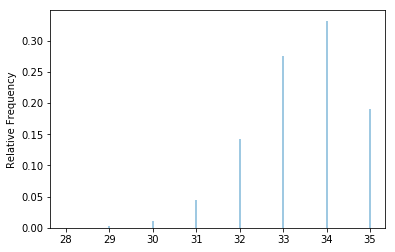

In [4]:
# probability space for the 35 birthdays
birthdays = 365
n = 35
P = BoxModel(list(range(birthdays)), size=n, replace=True)

# define a function that takes a list of people and counts number of distinct birthdays
def unique_birthdays(omega):
    return len(set(omega))

# define the RV
X = RV(P, unique_birthdays)

x = X.sim(10000)
x.plot()
x.count_eq(n) / 10000 # estimated prob that all birthdays are different

## Exer 9.5 - Harry

In [5]:
P = BoxModel([1, 2, 3, 4, 5], size=2, replace=False)
P.sim(10000).tabulate(normalize=True)

"(1, 2)",0.0497
"(1, 3)",0.0501
"(1, 4)",0.0483
"(1, 5)",0.0502
"(2, 1)",0.0493
"(2, 3)",0.0516
"(2, 4)",0.052
"(2, 5)",0.0459
"(3, 1)",0.0549
"(3, 2)",0.0506
"(3, 4)",0.0467


In [6]:
P = BoxModel([1, 2, 3, 4, 5], size=2, replace=False)
First, Second = RV(P)
(Second).sim(10000).tabulate(normalize=True)

1,0.2023
2,0.1982
3,0.2065
4,0.1977
5,0.1953
Total,1.0


In [7]:
(Second | (First == 1) ).sim(10000).tabulate([1, 2, 3, 4, 5], normalize=True)

1,0.0
2,0.2546
3,0.253
4,0.2457
5,0.2467
Total,1.0


In [8]:
(Second | ~(First == 1) ).sim(10000).tabulate([1, 2, 3, 4, 5], normalize=True)

1,0.249
2,0.1852
3,0.1878
4,0.1874
5,0.1906
Total,1.0


## Exer 9.6 - presidential approval

In [9]:
def party_approval():
    x = BoxModel(['R', 'I', 'D'], probs=[0.28, 0.45, 0.27]).draw()
    if x == 'R':
        y = BoxModel(['A', 'not A'], probs=[0.85, 0.15]).draw()
    elif x == 'I':
        y = BoxModel(['A', 'not A'], probs=[0.36, 0.64]).draw()
    else:
        y = BoxModel(['A', 'not A'], probs=[0.08, 0.92]).draw()
    return x, y
        
        
P = ProbabilitySpace(party_approval)
P.sim(100000).tabulate()

"('D', 'A')",2149
"('D', 'not A')",24775
"('I', 'A')",16116
"('I', 'not A')",29069
"('R', 'A')",23775
"('R', 'not A')",4116
Total,100000


In [10]:
Party, Approval = RV(P)
(Party | (Approval == 'A') ).sim(10000).tabulate(normalize=True)

D,0.0539
I,0.3869
R,0.5592
Total,1.0
